In [34]:
name = "Md Asaduzzaman Shahin"
id = "48225320"
dataset_source = "https://www.kaggle.com/datasets/zusmani/uberdrives"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
from datetime import datetime

In [2]:
uber_data = pd.read_csv('My Uber Drives - 2016.csv')
print(uber_data.shape)

(1156, 7)


### Exploring the dataset

In [3]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
(uber_data.isna().sum() / uber_data.shape[0]) * 100


START_DATE*     0.000000
END_DATE*       0.086505
CATEGORY*       0.086505
START*          0.086505
STOP*           0.086505
MILES*          0.000000
PURPOSE*       43.512111
dtype: float64

**_Findings:_**
- The Purpose column exhibits a 43.46% values missing, indicating that approximately half of the entries in this column lack data.


In [27]:
uber_data.nunique()


start_date    1097
end_date      1097
category         2
start          160
stop           173
miles          201
purpose         10
dtype: int64

In [6]:
uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
uber_data.describe(include='object')

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,PURPOSE*
count,1156,1155,1155,1155,1155,653
unique,1155,1154,2,177,188,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,Meeting
freq,2,2,1078,201,203,187


In [8]:
# renaming the columns for the ease of use
uber_data = uber_data.rename(columns=lambda x: x.replace('*', '').lower())

In [9]:
uber_data.columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

### Data Cleaning

In [10]:
# converting STARTDATE and ENDDATE into datetime datetype to extract time and date 
uber_data['start_date'] = pd.to_datetime(uber_data['start_date'],errors='coerce')
uber_data['end_date'] = pd.to_datetime(uber_data['end_date'],errors='coerce')

In [11]:
uber_data.duplicated().sum()

1

In [12]:
uber_data = uber_data.drop_duplicates()
print(uber_data.shape)

(1155, 7)


**treatment of null values in PURPOSE column as it carried about 43% of NaN values**  
**filling the NaN values with Unknown variable to avoid data loss**

In [13]:

uber_data['purpose'].fillna("Unknown", inplace=True)
print(uber_data['purpose'])


0        Meal/Entertain
1               Unknown
2       Errand/Supplies
3               Meeting
4        Customer Visit
             ...       
1151     Temporary Site
1152            Meeting
1153     Temporary Site
1154     Temporary Site
1155            Unknown
Name: purpose, Length: 1155, dtype: object


C:\Users\Shahin\AppData\Local\Temp\ipykernel_1040\3120909322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['purpose'].fillna("Unknown", inplace=True)


In [14]:
percentile_95 = uber_data['miles'].quantile(0.95)

# Filter the data to keep only values up to the 95th percentile
uber_data = uber_data[uber_data['miles'] <= percentile_95]

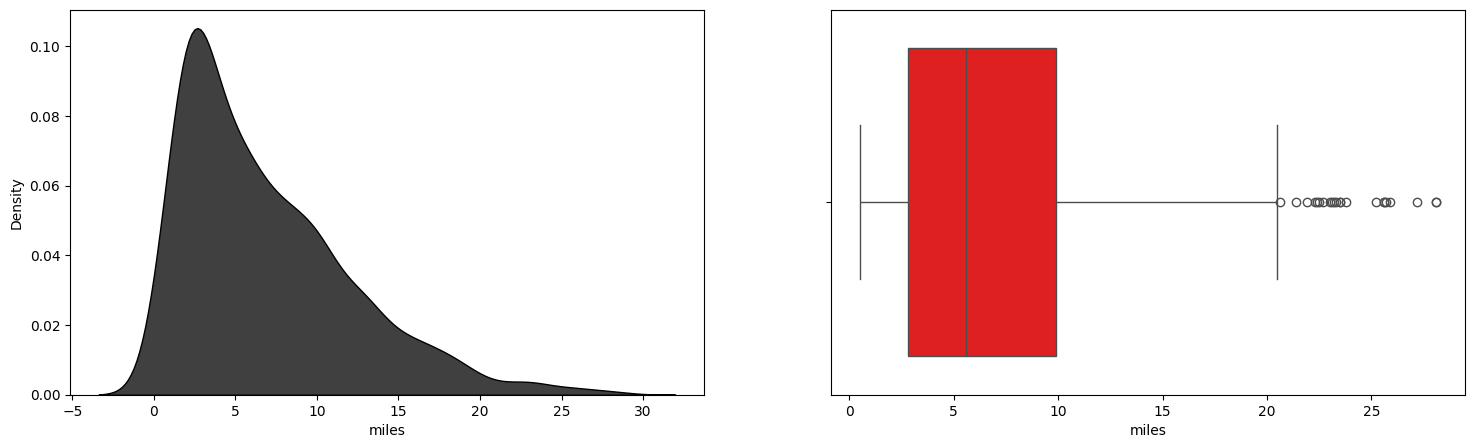

In [15]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.kdeplot(x=uber_data.miles,color='black',multiple='stack')
plt.subplot(1,2,2)
sns.boxplot(x=uber_data.miles,color='red')
plt.show()

From the kernel density plot, we can observe that the distribution of miles is right-skewed, with a peak around 1-10 miles, indicating that a significant portion of rides are relatively short distances. However, there is also a long tail extending towards higher mileage values, suggesting the presence of some longer rides.  
The box plot is a standardized way of displaying the distribution of a dataset based on five summary statistics: the minimum value, the first quartile (25th percentile), the median (50th percentile), the third quartile (75th percentile), and the maximum value. It also highlights potential outliers as individual points beyond the whiskers (lines extending from the box).

In [16]:
uber_data.describe()

,start_date,end_date,miles
count,1097,1097,1097.000000
mean,2016-07-16 04:11:18.650865920,2016-07-16 04:30:39.270738432,6.922972
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000
25%,2016-03-29 23:04:00,2016-03-29 23:21:00,2.800000
50%,2016-07-19 17:14:00,2016-07-19 17:24:00,5.600000
75%,2016-10-27 18:51:00,2016-10-27 19:16:00,9.900000
max,2016-12-31 21:32:00,2016-12-31 21:50:00,28.100000
std,NaN,NaN,5.231476


In [17]:

# Analyze factors contributing to an increase in the number of rides
factors = ['category', 'start', 'stop', 'purpose']
ride_factors = uber_data[factors].value_counts().head(5)

# Print the factors contributing to an increase in the number of rides
print("Factors contributing to an increase in the number of rides:")
print(ride_factors)

Factors contributing to an increase in the number of rides:
category  start             stop              purpose       
Business  Unknown Location  Unknown Location  Unknown           48
          Cary              Durham            Meeting           27
                            Morrisville       Meal/Entertain    27
          Durham            Cary              Meeting           25
          Morrisville       Cary              Unknown           20
Name: count, dtype: int64


The code prints the top 5 combinations of these factors that have the highest number of rides. For example, the combination of 'Business' category, 'Unknown Location' for start and stop locations, and 'Unknown' purpose has the highest count of 48 rides.  
However, it does not analyze the impact of weather and special events on the number of rides. This is because the dataset does not contain any information related to weather conditions or special events occurring during the ride periods.

### Finding out peak months, peak days of the week and peak hours of the day

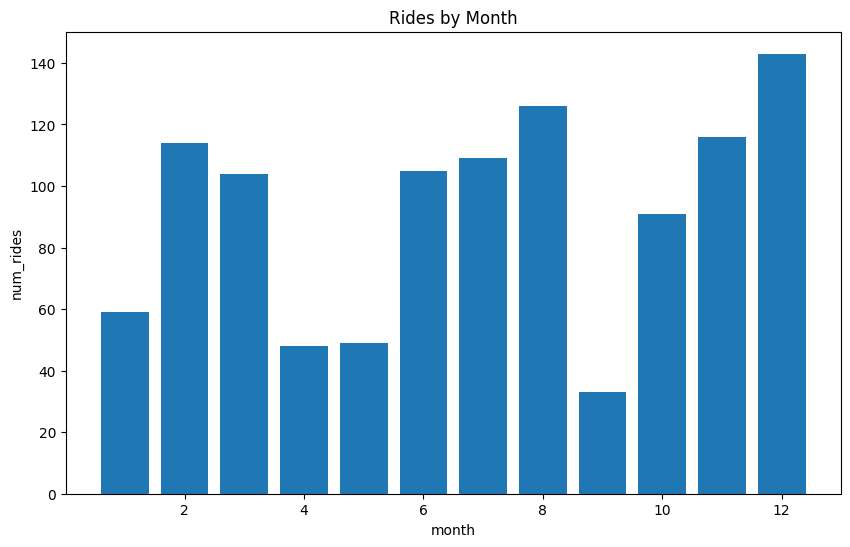

Peak Months:
     month  num_rides
11     12        143
7       8        126
10     11        116


In [31]:
# Convert start_date to datetime
uber_data['start_date'] = pd.to_datetime(uber_data['start_date'])

# Group by month and count rides
monthly_rides = uber_data.groupby(uber_data['start_date'].dt.month).size().reset_index()
monthly_rides.columns = ['month', 'num_rides']

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_rides['month'], monthly_rides['num_rides'])
plt.xlabel('month')
plt.ylabel('num_rides')
plt.title('Rides by Month')
plt.show()

# Peak Months
peak_months = monthly_rides.sort_values('num_rides', ascending=False)
print("Peak Months:\n", peak_months.head(3))


The second visualization is a bar chart that displays the total number of rides per month throughout the year. From this chart, we can observe that the peak months for ride demand were December, August and November, likely due to factors such as summer vacations, increased leisure travel, or other seasonal effects. The months with the lowest ride demand appear to be September.

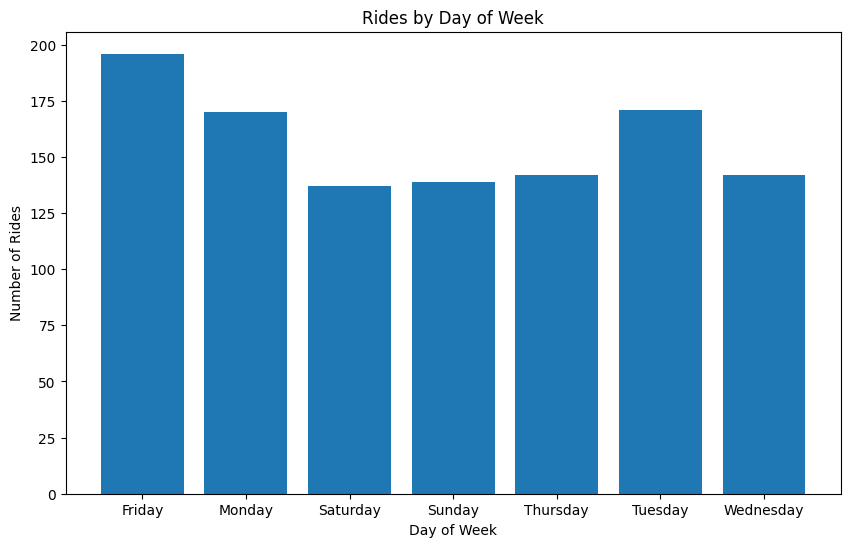


Peak Days:
 start_date
Friday     196
Tuesday    171
Monday     170
dtype: int64


In [19]:
# Group by day of week and count rides 
weekly_rides = uber_data.groupby(uber_data['start_date'].dt.day_name()).size().reset_index()
weekly_rides.columns = ['day', 'num_rides']

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(weekly_rides['day'], weekly_rides['num_rides'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides') 
plt.title('Rides by Day of Week')
plt.show()


# Peak Days
peak_days = uber_data.groupby(uber_data['start_date'].dt.day_name()).size().sort_values(ascending=False)  
print("\nPeak Days:\n", peak_days.head(3))

The peak on Fridays likely corresponds to increased demand for rides during the weekend, whether for social activities, travel, or other purposes.  
Tuesdays and Mondays being among the top days could be related to commuter demand or business travel at the start of the work week.

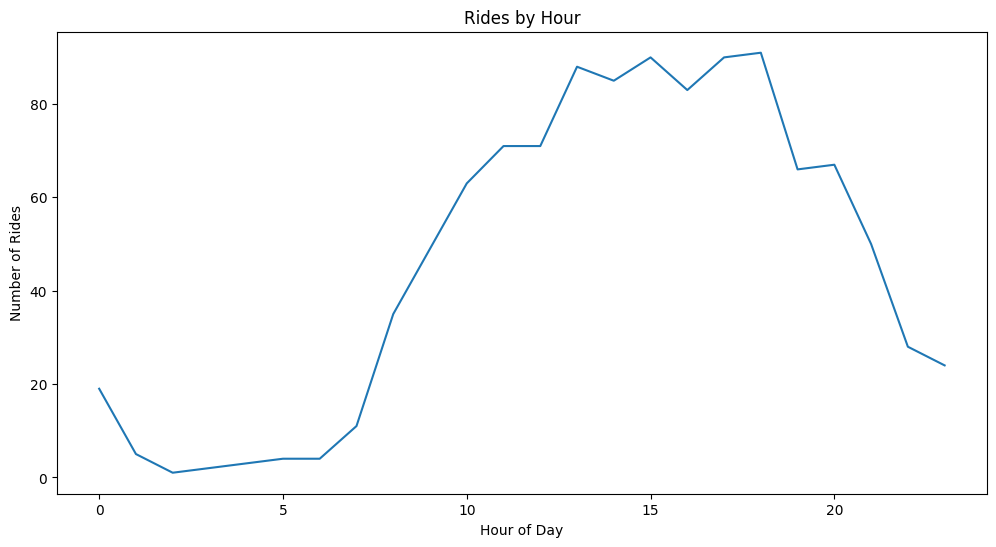


Peak Hours:
 start_date
18    91
17    90
15    90
dtype: int64


In [20]:
# Group by hour and count rides
hourly_rides = uber_data.groupby(uber_data['start_date'].dt.hour).size().reset_index()
hourly_rides.columns = ['hour', 'num_rides']

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_rides['hour'], hourly_rides['num_rides'])
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Rides by Hour')
plt.show()



# Peak Hours 
peak_hours = uber_data.groupby(uber_data['start_date'].dt.hour).size().sort_values(ascending=False)
print("\nPeak Hours:\n", peak_hours.head(3))

The number of rides starts to increase gradually from the early morning hours, around 6 AM to 8 AM.  
Ride demand continues to rise steadily throughout the day, reaching its peak between 3 PM and 6 PM, with the highest number of rides occurring around 4 PM.  
After the evening peak, the number of rides declines sharply, with a steep drop-off in demand during the late-night hours.

### Exploratory Data Analysis of Uber Rides Dataset

**Extracts the relevant features ('start_date', 'end_date', 'category', 'start', 'stop') and the target variable ('miles').**

In [21]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Prepare data
X = uber_data[['start_date', 'end_date', 'category', 'start', 'stop']].copy()
y = uber_data['miles']

# Convert 'start_date' and 'end_date' to timestamp
X['start_date'] = X['start_date'].apply(lambda x: x.timestamp())
X['end_date'] = X['end_date'].apply(lambda x: x.timestamp())

# Convert categorical data to numerical values
labelencoder = LabelEncoder()
X['category'] = labelencoder.fit_transform(X['category'])
X['start'] = labelencoder.fit_transform(X['start'])
X['stop'] = labelencoder.fit_transform(X['stop'])

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Polynomial Regression 
poly_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                     ('model', LinearRegression())])
poly_reg.fit(X, y)

# Feature Selection using RFE
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=3)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print(f"Selected Features: {', '.join(selected_features)}")

Selected Features: start_date, category, start


By selecting these three features, the RFE algorithm has identified the most relevant predictors from the available set of features ('start_date', 'end_date', 'category', 'start', 'stop'). These selected features can be used to build a more parsimonious and potentially more accurate regression model for predicting ride distances in the Uber dataset.

### Classification and Clustering Models for Ride Category Prediction

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score

# Prepare data
X_class = uber_data[['start_date', 'end_date', 'start', 'stop', 'miles']].copy()
y_class = uber_data['category'].map({'Business': 1, 'Personal': 0})

# Convert 'start_date' and 'end_date' to timestamp
X_class['start_date'] = X_class['start_date'].apply(lambda x: x.timestamp())
X_class['end_date'] = X_class['end_date'].apply(lambda x: x.timestamp())

# Convert 'start' and 'stop' to numeric values
labelencoder = LabelEncoder()
X_class['start'] = labelencoder.fit_transform(X_class['start'])
X_class['stop'] = labelencoder.fit_transform(X_class['stop'])



# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_class, y_class)
# Predict on the training data
y_pred = log_reg.predict(X_class)

# Calculate accuracy
accuracy = accuracy_score(y_class, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(y_class, y_pred)
print("Logistic Regression F1-score:", f1)




# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_class, y_class)
#calculate accuracy
y_pred_rf = rf_model.predict(X_class)
accuracy_rf = accuracy_score(y_class, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest F1-score:", f1_score(y_class, y_pred_rf))



# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_class)
kmeans.fit(X_class)
# Predict on the training data
y_pred_kmeans = kmeans.predict(X_class)
# Calculate accuracy
accuracy_kmeans = accuracy_score(y_class, y_pred_kmeans)
print("K-Means Clustering Accuracy:", accuracy_kmeans)
print("K-Means Clustering F1-score:", f1_score(y_class, y_pred_kmeans))


Logistic Regression Accuracy: 0.9316317228805834
Logistic Regression F1-score: 0.9646059462010382
Random Forest Accuracy: 1.0
Random Forest F1-score: 1.0
K-Means Clustering Accuracy: 0.5560619872379216
K-Means Clustering F1-score: 0.6965732087227414


**Logistic Regression:**  
Accuracy: 0.9316 (93.16%)  
F1-score: 0.9646  
The logistic regression model achieves a reasonably high accuracy of 93.16% and an F1-score of 0.9646 in predicting the ride category. The F1-score, which is the harmonic mean of precision and recall, indicates a good balance between these two metrics.  

**Random Forest Classifier:**  
Accuracy: 1.0 (100%)  
F1-score: 1.0  
The random forest classifier performs exceptionally well, achieving perfect accuracy and an F1-score of 1.0. This suggests that the model can accurately classify the ride categories without any misclassifications on the training data.  

**K-Means Clustering:**  
Accuracy: 0.5561 (55.61%)  
F1-score: 0.6965  
The K-Means clustering model, which is an unsupervised learning technique, performs relatively poorly compared to the supervised classification models. Its accuracy of 55.61% and an F1-score of 0.6965 indicate that it may not be the most suitable approach for this classification task.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}

# Create the GridSearchCV object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_class, y_class)

# Print the best parameters and score
print(f"Best Parameters (KNN): {grid_search.best_params_}")
print(f"Best Score (KNN): {grid_search.best_score_:.2f}")

Best Parameters (KNN): {'n_neighbors': 9, 'weights': 'uniform'}
Best Score (KNN): 0.61


The output shows that the best hyperparameters for the KNN classifier on this dataset are {'n_neighbors': 9, 'weights': 'uniform'}, with a best accuracy score of 0.61 (61%).  
The accuracy score of 0.61 may or may not be considered satisfactory, depending on the requirements of the problem and the performance of other models. Further analysis, such as evaluating the model's performance on a separate test set or exploring other evaluation metrics (e.g., precision, recall, F1-score), may be necessary to assess the model's suitability.